# Problem Definition

### Our main objective is to predict the score of a particular match based on the situation of the match and give the resultant (approximate) total score in an unbiased way

# Datasets

### We have collected four datasets from different resources and each of us used one dataset so that every single dataset will have its own accuracy . I am using ipl dataset . Basically each dataset will have a match id , date of the match , venue , batting_team(country's name) , bowling_team(country's name) , batsman at the striker end , bowler , runs scored , wickets taken and so on . We checked the flaws in the datasets and implemented models.


### Training dataset --> 70%

### Testing dataset --> 30%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
ipl=pd.read_csv('ipl.csv')

In [3]:
ipl=pd.read_csv('ipl.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
#checking if any important attribute doesn't have data
ipl[ipl['venue'].isnull()==True]

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total


In [5]:
ipl[ipl['bat_team'].isnull()==True]

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total


In [6]:
ipl[ipl['bowl_team'].isnull()==True]

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total


In [7]:
ipl[ipl['batsman'].isnull()==True]

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total


In [8]:
ipl[ipl['bowler'].isnull()==True]

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total


In [9]:
#let's check most used stadiums(unique stadiums)
ipl['venue'].unique()
ipl['count']=1
ipl.groupby(['venue']).count()['count']

venue
Barabati Stadium                                         856
Brabourne Stadium                                       1380
Buffalo Park                                             380
De Beers Diamond Oval                                    368
Dr DY Patil Sports Academy                              2088
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     1113
Dubai International Cricket Stadium                      868
Eden Gardens                                            7049
Feroz Shah Kotla                                        7068
Green Park                                               492
Himachal Pradesh Cricket Association Stadium            1115
Holkar Cricket Stadium                                   617
JSCA International Stadium Complex                       837
Kingsmead                                               1731
M Chinnaswamy Stadium                                   7443
MA Chidambaram Stadium, Chepauk                         5972
Maharashtra Cricke

In [10]:
ipl['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [11]:
#matches where csk is the opponent
csk=ipl[(ipl['bat_team']=='Chennai Super Kings')|(ipl['bowl_team']=='Chennai Super Kings')]
csk.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,count
124,2,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Kings XI Punjab,PA Patel,B Lee,0,0,0.1,0,0,0,0,240,1
125,2,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Kings XI Punjab,PA Patel,B Lee,0,0,0.2,0,0,0,0,240,1
126,2,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Kings XI Punjab,PA Patel,B Lee,1,0,0.3,1,0,1,0,240,1
127,2,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Kings XI Punjab,ML Hayden,B Lee,1,0,0.4,1,0,1,0,240,1
128,2,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Kings XI Punjab,ML Hayden,B Lee,5,0,0.5,5,0,4,1,240,1


In [12]:
csk

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,count
124,2,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Kings XI Punjab,PA Patel,B Lee,0,0,0.1,0,0,0,0,240,1
125,2,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Kings XI Punjab,PA Patel,B Lee,0,0,0.2,0,0,0,0,240,1
126,2,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Kings XI Punjab,PA Patel,B Lee,1,0,0.3,1,0,1,0,240,1
127,2,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Kings XI Punjab,ML Hayden,B Lee,1,0,0.4,1,0,1,0,240,1
128,2,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Kings XI Punjab,ML Hayden,B Lee,5,0,0.5,5,0,4,1,240,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61935,503,2015-05-24,Eden Gardens,Mumbai Indians,Chennai Super Kings,HH Pandya,DJ Bravo,191,5,19.2,57,2,35,0,202,1
61936,503,2015-05-24,Eden Gardens,Mumbai Indians,Chennai Super Kings,AT Rayudu,DJ Bravo,192,5,19.3,56,2,36,0,202,1
61937,503,2015-05-24,Eden Gardens,Mumbai Indians,Chennai Super Kings,Harbhajan Singh,DJ Bravo,198,5,19.4,56,2,36,6,202,1
61938,503,2015-05-24,Eden Gardens,Mumbai Indians,Chennai Super Kings,Harbhajan Singh,DJ Bravo,202,5,19.5,58,2,36,6,202,1


In [13]:
#number of balls bowled in the year 2010
s=0
for i in ipl['date']:
    if(i[:4]=="2010"):
        s+=1
print("Number of balls bowled in the year 2010 :",end=" ")
print(s)

Number of balls bowled in the year 2010 : 7491


/home/adhinene/.local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/adhinene/.local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/adhinene/.local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


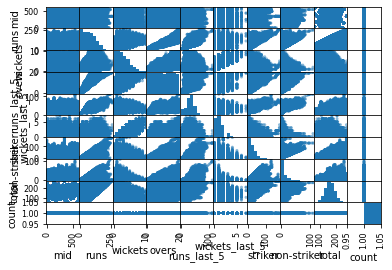

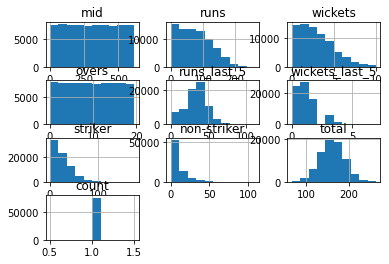

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(ipl)
plt.show()
ipl.hist()
plt.show()

In [15]:
#Replacing all big names of the teams into shortcuts and there is a team which was labelled twice in a
#unique way . I changed it so that there would be no confusion
ipl.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
             'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
             'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
            ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,count
0,1,2008-04-18,M Chinnaswamy Stadium,KKR,RCB,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222,1
1,1,2008-04-18,M Chinnaswamy Stadium,KKR,RCB,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222,1
2,1,2008-04-18,M Chinnaswamy Stadium,KKR,RCB,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222,1
3,1,2008-04-18,M Chinnaswamy Stadium,KKR,RCB,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222,1
4,1,2008-04-18,M Chinnaswamy Stadium,KKR,RCB,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222,1


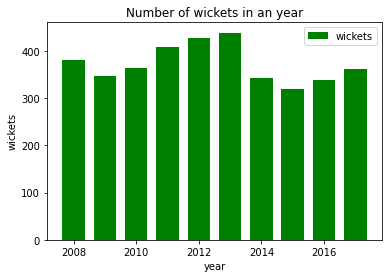

In [16]:
#graph of year vs number of wickets
arr=[]
brr=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
s=0
for i in range(76012):
    if(ipl['mid'][i]!=ipl['mid'][i+1]):
        if(int(ipl['date'][i][:4])!=int(ipl['date'][i+1][:4])):
            arr.append(s)
            s=0
        else:
            s+=int(ipl['wickets'][i])
s+=int(ipl['wickets'][76013])
arr.append(s)
plt.bar(brr,arr,color='g',width=0.72,label="wickets")
plt.xlabel('year')
plt.ylabel('wickets')
plt.title('Number of wickets in an year')
plt.legend()
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
X=ipl.iloc[:,[7,8,9,12,13]].values
y=ipl.iloc[:,14].values
print(X)
print(y)

[[1.00e+00 0.00e+00 1.00e-01 0.00e+00 0.00e+00]
 [1.00e+00 0.00e+00 2.00e-01 0.00e+00 0.00e+00]
 [2.00e+00 0.00e+00 2.00e-01 0.00e+00 0.00e+00]
 ...
 [1.28e+02 7.00e+00 1.94e+01 4.70e+01 1.20e+01]
 [1.29e+02 7.00e+00 1.95e+01 4.70e+01 1.30e+01]
 [1.29e+02 8.00e+00 1.96e+01 4.70e+01 1.30e+01]]
[222 222 222 ... 129 129 129]


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
drr=[]
frr=[]

In [23]:
#This function basically predicts the accuracy of the model . It's the difference between predicted and 
#actual score . If this difference falls below a particular thresold, we count it as a correct prediction.
def custom_accuracy(y_test,y_pred,thresold):
    right=0
    l=len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i])<=thresold):
            right+=1
    return((right/l)*100)

# Lasso Regression

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
las = Lasso(alpha=0.01, max_iter=10e5)
las.fit(X_train,y_train)
y_pred = las.predict(X_test)
las_acc=custom_accuracy(y_test,y_pred,20)
score = las.score(X_test,y_test)*100
print("R-squared value:" , score)
print("Custom accuracy:",las_acc)
new_prediction = las.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" , new_prediction)

R-squared value: 50.61860581256076
Custom accuracy: 73.58035518526638
Prediction score: [4260.08314839]


# Linear Regression

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Training the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)
# Testing the dataset on trained model
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R square value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))
lacc=custom_accuracy(y_test,y_pred,20)
# Testing with a custom input
import numpy as np
new_prediction = lin.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" , new_prediction)

R square value: 50.62027118729324
Custom accuracy: 73.58035518526638
Prediction score: [179.95087834]


# Random Forest Regressor

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Training the dataset
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,max_features=None)
reg.fit(X_train,y_train)
# Testing the dataset on trained model
y_pred = reg.predict(X_test)
score = reg.score(X_test,y_test)*100
print("R square value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))
rfacc=custom_accuracy(y_test,y_pred,20)
# Testing with a custom input
import numpy as np
new_prediction = reg.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" , new_prediction)

R square value: 66.44489992616518
Custom accuracy: 83.53431265073449
Prediction score: [175.66]


# K nearest neighbours

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Training the dataset
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train,y_train)
# Testing the dataset on trained model
y_pred = knn.predict(X_test)
score = knn.score(X_test,y_test)*100
print("R square value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))
kacc=custom_accuracy(y_test,y_pred,20)
drr.append(custom_accuracy(y_test,y_pred,20))
# Testing with a custom input
import numpy as np
new_prediction = knn.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" , new_prediction)

R square value: 39.65796974347731
Custom accuracy: 72.64634948476211
Prediction score: [172]


In [43]:
drr

[77.98728349046262, 75.83424687568515, 74.04516553387414, 72.59811444858583]

In [44]:
err=[3,5,7,9]

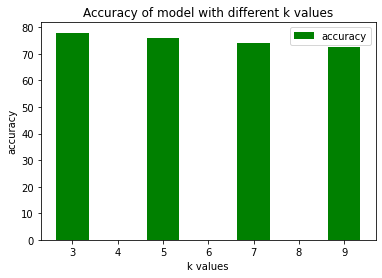

In [45]:
plt.bar(err,drr,color='g',width=0.72,label="accuracy")
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.title('Accuracy of model with different k values')
plt.legend()
plt.show()

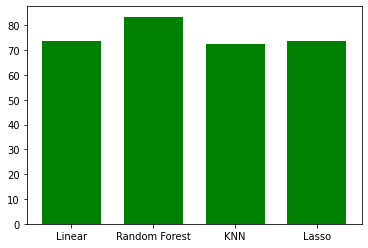

In [25]:
frr.append(lacc)
frr.append(rfacc)
frr.append(kacc)
frr.append(las_acc)
grr=['Linear','Random Forest','KNN','Lasso']
plt.bar(grr,frr,color='green',width=0.72)
plt.show()

In [8]:
cur_score=int(input("Enter Current Score : "))
cur_wickets=int(input("Enter Number Of Wickets : "))
cur_overs=int(input("Enter Number Of Overs Played : "))
cur_striker=int(input("Enter Striker's score : "))
cur_non_striker=int(input("Enter Non-Striker's score : "))
if cur_score<cur_striker+cur_non_striker or cur_overs<0 or cur_overs>20:
    print('Error in Input')
else:
    new_prediction = reg.predict(sc.transform(np.array([[cur_score,cur_wickets,cur_overs,cur_striker,cur_non_striker]])))
    print("Random Forest Regression - Prediction score:" , new_prediction)

Enter Current Score : 100
Enter Number Of Wickets : 3
Enter Number Of Overs Played : 13
Enter Striker's score : 50
Enter Non-Striker's score : 16
Random Forest Regression - Prediction score: [162.28]
